## PROBLEM 1: Supervised Classification Libraries: Regression, Decision Tree 

In [26]:
import numpy as np
from sklearn.datasets import fetch_openml, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
## MNIST
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False,parser='auto')
X_mnist = X_mnist / 255.0  # Normalize
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(
    X_mnist, y_mnist, test_size=0.2, random_state=17
)

In [6]:
scaler = StandardScaler()
X_mnist_train_scaled = scaler.fit_transform(X_mnist_train) # statndardized all features of X, x' = (x-mean)/std
X_mnist_test_scaled = scaler.transform(X_mnist_test) # by each feature, do the same transformation using the mean and std of X_train 

In [48]:
#logistic regression
def lr(X_train, y_train, X_test, y_test):
    """
    Train a Logistic Regression model on the provided training data, evaluate it on the test data,
    Return max absolute coefficients across each class.
    """
    # Initialize and train the logistic regression model
    lr_model = LogisticRegression(penalty='l2', max_iter=1000, random_state=17)
    lr_model.fit(X_train, y_train)
    
    # Compute the test accuracy
    accuracy = lr_model.score(X_test, y_test)
    print(f'Logistic Regression accuracy: {accuracy}')
    
    # Compute the max abs value of the coefficients for each class
    coef = np.max(np.abs(lr_model.coef_), axis=0)  #np.mean(np.abs(lr_model.coef_), axis=0)
        
    return coef

def plot_important_pixels(coef, X_shape=(28,28),num_features=30):
    """
    Plot the most important pixels based on the coefficients.

    Parameters:
    coef (array-like): Coefficients indicating the importance of each feature.
    X_shape (tuple): Shape of the input data (default is (28, 28)).
    feature_names (list, optional): List of feature names.
    num_features (int): Number of top features to plot (default is 30).

    Returns:
    None
    """
    mask = np.zeros_like(coef, dtype=bool)
    top_indices = np.argsort(coef)[-num_features:]
    mask[top_indices] = True
    masked_coef = np.zeros_like(coef)
    masked_coef[top_indices] = coef[top_indices]

    # Reshape the masked coefficients to the original image shape
    coef_reshaped = masked_coef.reshape(X_shape)
    #plot heatmap
    plt.figure(figsize=(6, 6))
    plt.imshow(coef_reshaped,interpolation='nearest',cmap='Blues_r')
    plt.colorbar(label='Weight Value')
    plt.title(f"Top {num_features} Important features")
    plt.show()


In [24]:
coef = lr(X_mnist_train_scaled, y_mnist_train, X_mnist_test_scaled, y_mnist_test)

Logistic Regression accuracy: 0.9160714285714285


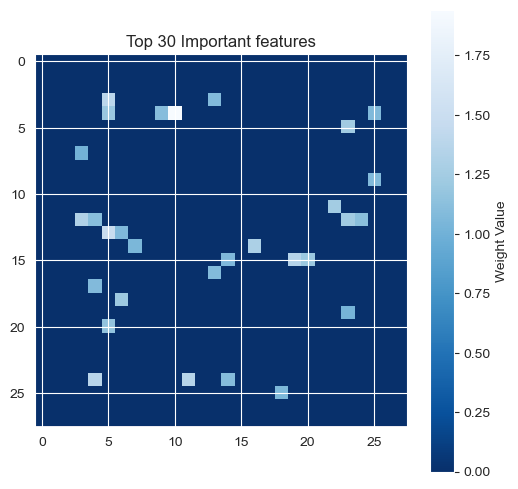

In [49]:
plot_important_pixels(coef)

In [72]:
#decision tree
def dt(X_train, y_train, X_test, y_test,max_depth=10):
    """
    Train a Decision Tree model on the provided training data, evaluate it on the test data,
    print acc and return importances
    """
    # Initialize and train the decision tree classifier
    dt_model = DecisionTreeClassifier(random_state=17,max_depth=max_depth)
    dt_model.fit(X_train, y_train)
    
    # Compute the test accuracy
    accuracy = dt_model.score(X_test, y_test)
    print(f'Decision Tree accuracy: {accuracy}')
    
    # Get feature importances from the trained model
    importances = dt_model.feature_importances_
    
    return importances

In [53]:
## 20 newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_features = 10000, stop_words='english')
X_20ng = vectorizer.fit_transform(newsgroups.data).toarray()
y_20ng = newsgroups.target
X_20ng_train, X_20ng_test, y_20ng_train, y_20ng_test = train_test_split(
    X_20ng, y_20ng, test_size=0.2, random_state=17
)
feature_names_20ng = vectorizer.get_feature_names_out()

In [55]:
def plot_important_features(coef ,num_features=30, feature_names=None):
    """
    Plot the most important features based on the coefficients.

    Parameters:
    coef (array-like): Coefficients indicating the importance of each feature.
    feature_names (list, optional): List of feature names.
    num_features (int): Number of top features to plot (default is 30).

    Returns:
    None
    """
    
    top_indices = np.argsort(coef)[-num_features:]

    # bar plot features with weight
    plt.figure(figsize=(6, 6))
    plt.barh(feature_names[top_indices], coef[top_indices])
    plt.title(f"Top {num_features} Important features")
    plt.xlabel('Weight Value')
    plt.ylabel('Feature Name')
    plt.show()

Logistic Regression accuracy: 0.7220159151193634


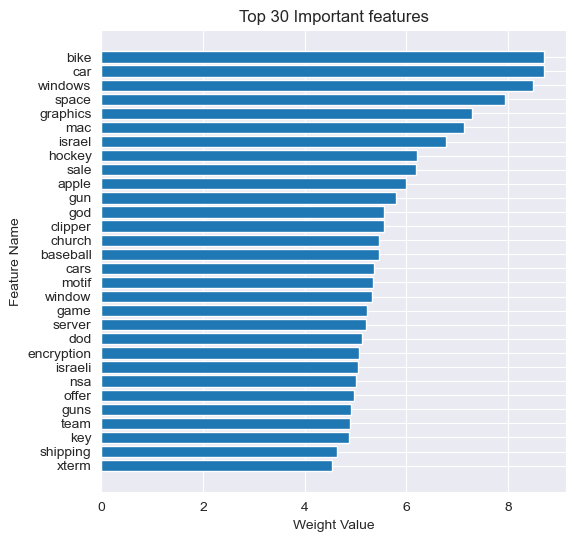

In [58]:
coef = lr(X_20ng_train, y_20ng_train, X_20ng_test, y_20ng_test)
plot_important_features(coef, feature_names=feature_names_20ng)

Decision Tree accuracy: 0.21883289124668434


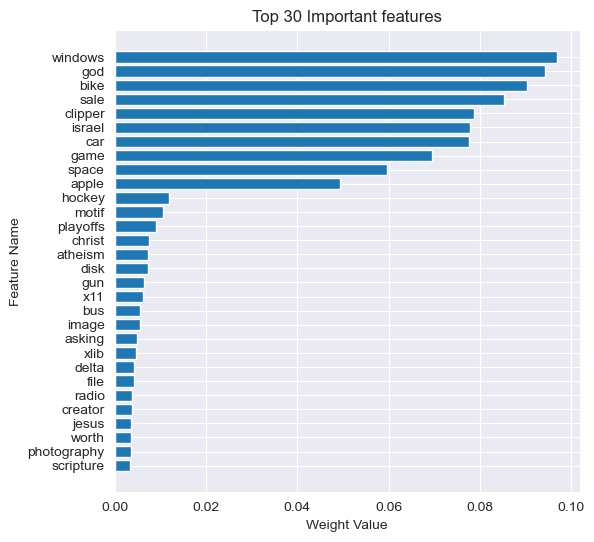

max tree depth = 10


In [74]:
importance_depth10 = dt(X_20ng_train, y_20ng_train, X_20ng_test, y_20ng_test,max_depth=10)
plot_important_features(importance_depth10, feature_names=feature_names_20ng)
print("max tree depth = 10")

max tree depth = 20
Decision Tree accuracy: 0.30610079575596816


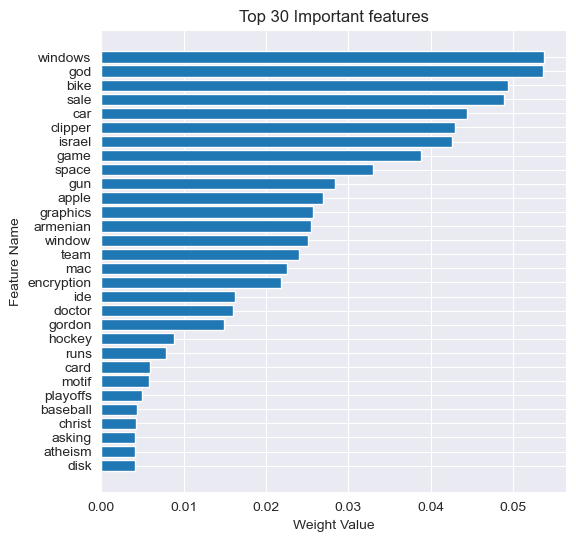

In [76]:
print("max tree depth = 20")
importance_depth20 = dt(X_20ng_train, y_20ng_train, X_20ng_test, y_20ng_test,max_depth=20)
plot_important_features(importance_depth20, feature_names=feature_names_20ng)


In [59]:
## spambase
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
# data (as pandas dataframes) 
X_spam = spambase.data.features 
y_spam = spambase.data.targets 

# Initialize the scaler
scaler = StandardScaler()
X_spam = scaler.fit_transform(X_spam)
X_spam_train, X_spam_test, y_spam_train, y_spam_test = train_test_split(
    X_spam, y_spam, test_size=0.2, random_state=17
)

C:\Users\fred9\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression accuracy: 0.9359391965255157


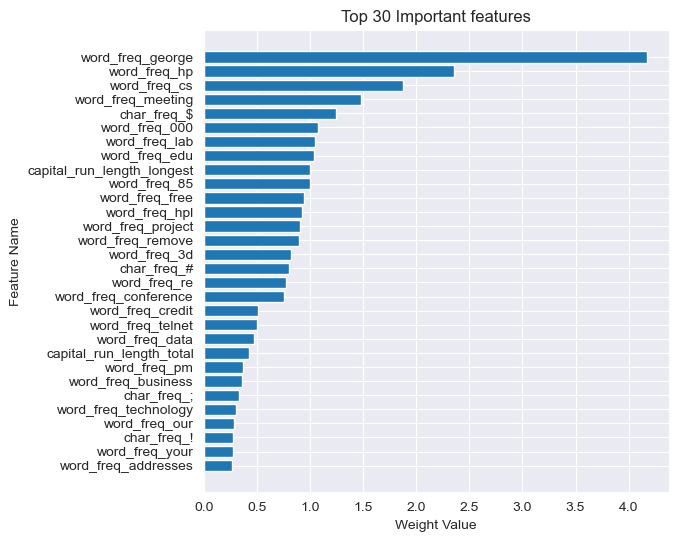

In [60]:
coef = lr(X_spam_train, y_spam_train, X_spam_test, y_spam_test)
plot_important_features(coef, feature_names=spambase.variables['name'])

max tree depth = 10
Decision Tree accuracy: 0.9348534201954397


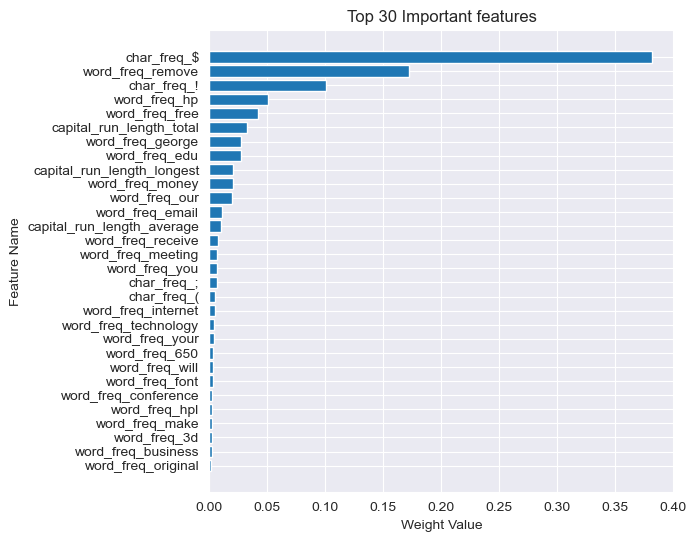

In [77]:
print("max tree depth = 10")
importance_depth10 = dt(X_spam_train, y_spam_train, X_spam_test, y_spam_test)
plot_important_features(importance_depth10, feature_names=spambase.variables['name'])

max tree depth = 20
Decision Tree accuracy: 0.9272529858849077


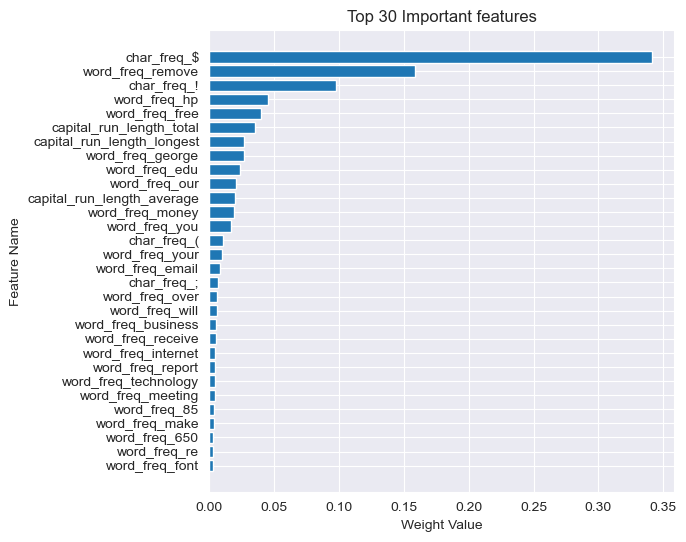

In [78]:
print("max tree depth = 20")
importance_depth20 = dt(X_spam_train, y_spam_train, X_spam_test, y_spam_test,max_depth=20)
plot_important_features(importance_depth20, feature_names=spambase.variables['name'])

## PROBLEM 2 : PCA library on MNIST

In [70]:
# part A
from sklearn.decomposition import PCA
# PCA for D=5
pca_5 = PCA(n_components=5)
X_mnist_train_pca5 = pca_5.fit_transform(X_mnist_train_scaled)
X_mnist_test_pca5 = pca_5.transform(X_mnist_test_scaled)

# PCA for D=20
pca_20 = PCA(n_components=20)
X_mnist_train_pca20 = pca_20.fit_transform(X_mnist_train_scaled)
X_mnist_test_pca20 = pca_20.transform(X_mnist_test_scaled)


In [84]:
lr(X_mnist_train_pca5, y_mnist_train, X_mnist_test_pca5, y_mnist_test)

Logistic Regression accuracy: 0.6768571428571428


array([0.84954994, 0.44065528, 0.82943185, 0.71069073, 0.44608954])

In [85]:
dt(X_mnist_train_pca5, y_mnist_train, X_mnist_test_pca5, y_mnist_test)

Decision Tree accuracy: 0.6971428571428572


array([0.24635969, 0.1106937 , 0.2529287 , 0.24575235, 0.14426556])

In [86]:
lr(X_mnist_train_pca20, y_mnist_train, X_mnist_test_pca20, y_mnist_test)

Logistic Regression accuracy: 0.8711428571428571


array([0.9747297 , 0.43185846, 0.83752149, 0.8455995 , 0.48597488,
       0.45602586, 0.35280627, 0.58070167, 0.49412751, 0.3981838 ,
       0.34577976, 0.2328943 , 0.5515457 , 0.56883308, 0.38032084,
       0.45229058, 0.33411997, 0.39743315, 0.4729024 , 0.23484054])

In [87]:
dt(X_mnist_train_pca20, y_mnist_train, X_mnist_test_pca20, y_mnist_test)

Decision Tree accuracy: 0.8125


array([0.16613059, 0.0536012 , 0.14692385, 0.14565568, 0.06042087,
       0.10571203, 0.00855451, 0.07649032, 0.03344726, 0.02394099,
       0.0183017 , 0.01466939, 0.04284525, 0.01651036, 0.01140919,
       0.01396627, 0.01142951, 0.01113704, 0.01046186, 0.02839214])

In [92]:
# part B
D_values = [5, 10, 20, 30, 40, 50]
for D in D_values:
    pca = PCA(n_components=D)
    X_spam_train_pca = pca.fit_transform(X_spam_train)
    X_spam_test_pca = pca.transform(X_spam_test)
    print(f'D={D}')
    _ = lr(X_spam_train_pca, y_spam_train['Class'], X_spam_test_pca, y_spam_test['Class'])
    _ = dt(X_spam_train_pca, y_spam_train['Class'], X_spam_test_pca, y_spam_test['Class'])
    print("======================================\n")

D=5
Logistic Regression accuracy: 0.8773072747014115
Decision Tree accuracy: 0.8968512486427795

D=10
Logistic Regression accuracy: 0.9033659066232356
Decision Tree accuracy: 0.8925081433224755

D=20
Logistic Regression accuracy: 0.9033659066232356
Decision Tree accuracy: 0.8957654723127035

D=30
Logistic Regression accuracy: 0.9218241042345277
Decision Tree accuracy: 0.8697068403908795

D=40
Logistic Regression accuracy: 0.9218241042345277
Decision Tree accuracy: 0.8697068403908795

D=50
Logistic Regression accuracy: 0.9337676438653637
Decision Tree accuracy: 0.8914223669923995


The accuracy in problem 1 for Spambase is around 93% for both Logistic Regression and Decision Tree. We get 92% for logistic regression and 89% for decision tree using D=30, which is comparable to problem 1. Further increasing D does not improve accuracy by much.  

## PROBLEM 3 : Implement PCA on MNIST

In [93]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None
        
    def fit(self, X):
        #make data 0 mean
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        #compute covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)
        U,S,Vt = np.linalg.svd(cov_matrix)
        self.components_= Vt[:self.n_components].T
        
        return self
    
    def transform(self, X):
        X_centered = X - self.mean_
        X_transformed = np.dot(X_centered, self.components_)
        return X_transformed
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [94]:
custumpca5 = CustomPCA(n_components=5)
X_mnist_train_custompca5 = custumpca5.fit_transform(X_mnist_train_scaled)
X_mnist_test_custompca5 = custumpca5.transform(X_mnist_test_scaled)

custumpca20 = CustomPCA(n_components=20)
X_mnist_train_custompca20 = custumpca20.fit_transform(X_mnist_train_scaled)
X_mnist_test_custompca20 = custumpca20.transform(X_mnist_test_scaled)

In [95]:
_ = lr(X_mnist_train_custompca5, y_mnist_train, X_mnist_test_custompca5, y_mnist_test)

Logistic Regression accuracy: 0.6767142857142857


In [96]:
_ = dt(X_mnist_train_custompca5, y_mnist_train, X_mnist_test_custompca5, y_mnist_test)

Decision Tree accuracy: 0.6955


In [97]:
_ = lr(X_mnist_train_custompca20, y_mnist_train, X_mnist_test_custompca20, y_mnist_test)

Logistic Regression accuracy: 0.8706428571428572


In [98]:
_ = dt(X_mnist_train_custompca20, y_mnist_train, X_mnist_test_custompca20, y_mnist_test)

Decision Tree accuracy: 0.8116428571428571


## PROBLEM 4 : PCA for cluster visualization

In [99]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

n_samples = 10000
np.random.seed(17)
indices = np.random.choice(X_mnist_train.shape[0], n_samples, replace=False)
X_sample = X_mnist_train[indices]
X_sample_scaled = scaler.fit_transform(X_sample)
y_sample = y_mnist_train[indices]

kmeans = KMeans(n_clusters=10, random_state=17,n_init='auto')
cluster_labels = kmeans.fit_predict(X_sample_scaled)

pca = PCA(n_components=20)
sample_pca = pca.fit_transform(X_sample_scaled)

In [83]:
pca.explained_variance_ratio_

array([0.05886445, 0.04363869, 0.03910475, 0.03057416, 0.02689805,
       0.023007  , 0.0207388 , 0.01824807, 0.016645  , 0.01490028,
       0.0144274 , 0.01291596, 0.01195072, 0.01163152, 0.01081815,
       0.01069118, 0.00984455, 0.00973643, 0.00949894, 0.00916417])

In [101]:
def plot_3d_pca(X, y, lables,title, components):
    shapes = ['o', '^', '+', '*', 's', 'x', 'd', 'p', 'h', 'v']
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for digit in range(10):
        mask = (y == str(digit))
        ax.scatter(X[mask, components[0]], X[mask, components[1]], X[mask, components[2]], 
                  color = plt.cm.jet(lables[mask]/10),  s=30, alpha=0.8, marker = shapes[digit],label=digit)
       # break
    ax.set_title(title)
    ax.set_xlabel(f'Principal Component {components[0]+1}')
    ax.set_ylabel(f'Principal Component {components[1]+1}')
    ax.set_zlabel(f'Principal Component {components[2]+1}')

    ax.legend()
    plt.show()

In [100]:
%matplotlib notebook

In [102]:
plot_3d_pca(sample_pca, y_sample, cluster_labels,  'KMeans Clustering of MNIST Samples', [0, 1, 2])

<IPython.core.display.Javascript object>

In [104]:
for _ in range(3):
    random_components = np.random.choice(20, 3, replace=False)
    plot_3d_pca(sample_pca, y_sample, cluster_labels,  'KMeans Clustering of MNIST Samples', random_components)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ROBLEM 5 : Implement Kernel PCA for Logistic Regression

### 3 circles

In [24]:
circles_df = pd.read_csv('dataset/threecircles.txt',names=['x','y','label'])
circles_df['label'].value_counts()

label
 1    334
-1    333
 0    333
Name: count, dtype: int64

In [25]:
train_3c, test_3c = train_test_split(circles_df, test_size=0.3, random_state=17)
test_3c['label'].value_counts()

label
 0    109
 1    108
-1     83
Name: count, dtype: int64

In [105]:
def logistic_regression(train_x, train_y, test_x, test_y):
    model = LogisticRegression(max_iter=1000)
    model.fit(train_x, train_y)
    pred = model.predict(test_x)
    acc = accuracy_score(test_y, pred)
    print("Accuracy of Logistic Regression: ", acc)

In [43]:
class KernelPCA:
    def __init__(self, sigma=3.0, n_components=None):
        self.sigma = sigma
        self.n_components = n_components

    def fit(self, X):
        self.X_fit_ = X
        N = X.shape[0]

        # Kernel matrix
        X2 = np.sum(X ** 2, axis=1) # shape: (m,1)
        dist_euclid = X2[:, np.newaxis] + X2[np.newaxis,:]  - 2 * np.dot(X, X.T) # shape: (m,m) 
        # follow the formula given by the matlab code of instruction , sigma controls the width of Gaussian
        K = np.exp(-dist_euclid / ( self.sigma))    
        

        # Center kernel
        U = np.ones((N, N)) / N
        Kn = K - U @ K - K @ U + U @ K @ U

        # Eigen decomposition and sort
        eigenvalues, eigenvectors = np.linalg.eigh(Kn)
        sort_idx = np.argsort(eigenvalues)[::-1]
        self.eigenvalues_ = eigenvalues[sort_idx]
        self.eigenvectors_ = eigenvectors[:, sort_idx]

        # Truncate if n_components specified
        if self.n_components is not None:
            self.eigenvalues_ = self.eigenvalues_[:self.n_components]
            self.eigenvectors_ = self.eigenvectors_[:, :self.n_components]

        # Project training data
        self.X_projected_ = Kn @ self.eigenvectors_

        # Store centering info
        self.K_fit_row_mean_ = np.mean(K, axis=0)
        self.K_fit_mean_ = np.mean(K)

        return self

    def transform(self, X_new):
        # Kernel between new and training data
        X_new2 = np.sum(X_new ** 2, axis=1)
        X_fit2 = np.sum(self.X_fit_ ** 2, axis=1)
        K_new = np.exp(-(X_new2[:, np.newaxis] + X_fit2 - 2 * np.dot(X_new, self.X_fit_.T)) / self.sigma)

        # Center and project
        K_new_centered = (K_new - self.K_fit_row_mean_[np.newaxis, :] -
                          np.mean(K_new, axis=1)[:, np.newaxis] + self.K_fit_mean_)
        return K_new_centered @ self.eigenvectors_

    def fit_transform(self, X):
        self.fit(X)
        return self.X_projected_

In [37]:
logistic_regression( train_3c[['x','y']], train_3c['label'], test_3c[['x','y']], test_3c['label'])

Accuracy of Logistic Regression:  0.41333333333333333


In [46]:
kpca = KernelPCA(sigma=3)
kpca.fit(train_3c[['x', 'y']].values)
XG_train = kpca.transform(train_3c[['x', 'y']].values)
XG_test = kpca.transform(test_3c[['x', 'y']].values)
lr(XG_train, train_3c['label'], XG_test, test_3c['label'])

Accuracy of Logistic Regression:  1.0


### 2 spirals

In [21]:
spirals_df = pd.read_csv('dataset/twoSpirals.txt',sep='\t',names=['x','y','label'])
spirals_df['label'].value_counts()

label
-1.0    500
 1.0    500
Name: count, dtype: int64

In [48]:
train_2s, test_2s = train_test_split(spirals_df, test_size=0.3, random_state=17)
logistic_regression( train_2s[['x','y']], train_2s['label'], test_2s[['x','y']], test_2s['label'])

Accuracy of Logistic Regression:  0.65


In [49]:
kpca = KernelPCA(sigma=3)
kpca.fit(train_2s[['x', 'y']].values)
XG_train = kpca.transform(train_2s[['x', 'y']].values)
XG_test = kpca.transform(test_2s[['x', 'y']].values)
logistic_regression(XG_train, train_2s['label'], XG_test, test_2s['label'])

Accuracy of Logistic Regression:  1.0
